# sentdex image recognition

### Requirements
1. Python 3 - 64 bit
2. numpy
3. matplotlib
4. pillow
5. [Tutorial Images](http://sentdex.com/tutorialimages.zip)

### checking for the requirements
* If the requirements are satisified the codes below should run without any errors

In [1]:
import numpy as np
import matplotlib
from PIL import Image # import Image - for 32 bit python

print("Working...")

Working...


In [2]:
image = Image.open('tutorialimages/images/dot.png')

In [3]:
# convert the image into a numpy array
image_array = np.asarray(image) # this would be a 3D array
# First Dimension for the pixel array
# Second Dimension for the pixel row
# Third Dimension for the pixel columns
# Our images are saved as 256 color bit map
print(image_array)

[[[  0   0   0 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 2

### Why RGB
* These are additive colors - The more we use the lighter it becomes unlike the stroking the paint brush again and again on the same stroke. Thus, white here is full of colors.

In [4]:
import matplotlib.pyplot as plt
plt.imshow(image_array)
plt.show()

<Figure size 640x480 with 1 Axes>

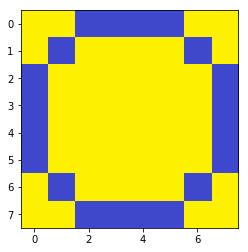

In [5]:
image = Image.open('tutorialimages/images/numbers/y0.4.png')
image_array = np.asarray(image)
plt.imshow(image_array)
plt.show()

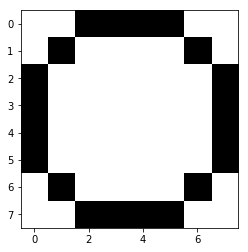

In [6]:
image = Image.open('tutorialimages/images/numbers/0.1.png')
image_array = np.asarray(image)
plt.imshow(image_array)
plt.show()

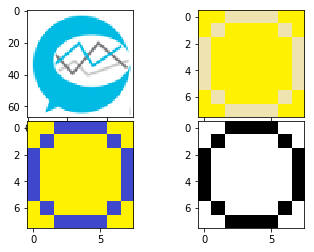

In [16]:
image_1 = Image.open('tutorialimages/images/sentdex.png')
image_array_1 = np.asarray(image_1)

image_2 = Image.open('tutorialimages/images/numbers/y0.4.png')
image_array_2 = np.asarray(image_2)

image_3 = Image.open('tutorialimages/images/numbers/y0.5.png')
image_array_3 = np.asarray(image_3)

image_4 = Image.open('tutorialimages/images/numbers/0.1.png')
image_array_4 = np.asarray(image_4)

fig = plt.figure()
ax1 = plt.subplot2grid((8, 8), (0, 0), rowspan = 4, colspan = 4)
ax2 = plt.subplot2grid((8, 8), (4, 0), rowspan = 4, colspan = 4)
ax3 = plt.subplot2grid((8, 8), (0, 4), rowspan = 4, colspan = 4)
ax4 = plt.subplot2grid((8, 8), (4, 4), rowspan = 4, colspan = 4)

ax1.imshow(image_array_1)
ax2.imshow(image_array_2)
ax3.imshow(image_array_3)
ax4.imshow(image_array_4)

plt.show()

### Thresholding
* For different coloured images like the one above we use thresholding to convert image into pure black and white
* If the RGB value of a pixel is above certain value it is white else black

In [19]:
from functools import reduce

def threshold(image_array):
    balance_array = []
    new_array = image_array.copy()
    
    for each_row in image_array:
        for each_pix in each_row:
            average_num = reduce(lambda x, y : x + y, each_pix[:3])/len(each_pix[:3])
            balance_array.append(average_num)
            
    balance_num = reduce(lambda x, y : x + y, balance_array)/len(balance_array)
    
    for each_row in new_array:
        for each_pix in each_row:
            pass
            
            if reduce(lambda x, y : x + y, each_pix[:3])/len(each_pix[:3]) > balance_num:
                each_pix[0] = 255
                each_pix[1] = 255
                each_pix[2] = 255
                each_pix[3] = 255
            else:
                each_pix[0] = 0
                each_pix[1] = 0
                each_pix[2] = 0
                each_pix[3] = 255
            
                
    return new_array

c:\users\vipul\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  if __name__ == '__main__':
c:\users\vipul\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars


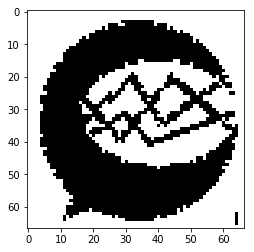

In [20]:
new_image_array_1 = threshold(image_array_1)
plt.imshow(new_image_array_1)
plt.show()

c:\users\vipul\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  if __name__ == '__main__':
c:\users\vipul\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars


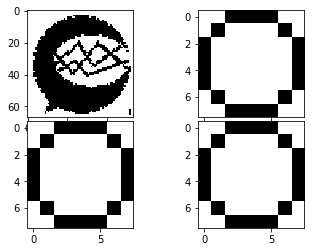

In [21]:
image_1 = Image.open('tutorialimages/images/sentdex.png')
image_array_1 = np.asarray(image_1)

image_2 = Image.open('tutorialimages/images/numbers/y0.4.png')
image_array_2 = np.asarray(image_2)

image_3 = Image.open('tutorialimages/images/numbers/y0.5.png')
image_array_3 = np.asarray(image_3)

image_4 = Image.open('tutorialimages/images/numbers/0.1.png')
image_array_4 = np.asarray(image_4)

fig = plt.figure()
ax1 = plt.subplot2grid((8, 8), (0, 0), rowspan = 4, colspan = 4)
ax2 = plt.subplot2grid((8, 8), (4, 0), rowspan = 4, colspan = 4)
ax3 = plt.subplot2grid((8, 8), (0, 4), rowspan = 4, colspan = 4)
ax4 = plt.subplot2grid((8, 8), (4, 4), rowspan = 4, colspan = 4)

ax1.imshow(threshold(image_array_1))
ax2.imshow(threshold(image_array_2))
ax3.imshow(threshold(image_array_3))
ax4.imshow(threshold(image_array_4))

plt.show()

In [25]:
def createExamples():
    number_array_examples = open('number_array_example.txt', 'a')
    all_numbers = range(0, 10)
    all_versions = range(1, 10)
    
    for each_num in all_numbers:
        for each_version in all_versions:
            # print(str(each_num) + '.' + str(each_version))
            image_file_path = 'tutorialimages/images/numbers/' + str(each_num) + '.' + str(each_version) + '.png'
            example_image = Image.open(image_file_path)
            example_image_array = np.asarray(example_image)
            example_image_array_list = str(example_image_array.tolist())
            
            line_to_write = str(each_num) + '::' + example_image_array_list + '\n'
            number_array_examples.write(line_to_write)
            
createExamples()

0
469
1
285
2
353
3
369
4
281
5
351
6
334
7
320
8
345
9
314


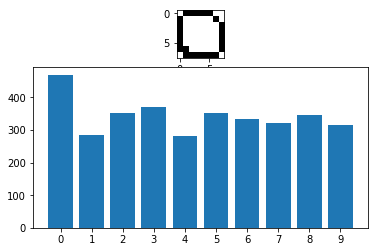

In [32]:
from collections import Counter

def guessTheNumber(file_path):
    matched_array = []
    load_examples = open('number_array_example.txt', 'r').read()
    load_examples = load_examples.split('\n')
    
    image = Image.open(file_path)
    image_array = np.asarray(image)
    image_array_list = image_array.tolist()
    
    test_sample = str(image_array_list)
    
    for each_example in load_examples:
        if len(each_example) > 3:
            split_example = each_example.split('::')
            current_num = split_example[0]
            current_array = split_example[1]
            
            each_example_pixel = current_array.split('],')
            each_sample_pixel = test_sample.split('],')
            
            x = 0
            while x < len(each_example_pixel):
                if each_example_pixel[x] == each_sample_pixel[x]:
                    matched_array.append(int(current_num))
                    
                x += 1
                
    # print(matched_array)
    x = Counter(matched_array)
    # print(x)
    
    graph_x = []
    graph_y = []
    
    for each_key in x:
        print(each_key)
        graph_x.append(each_key)
        print(x[each_key])
        graph_y.append(x[each_key])
        
    fir = plt.figure()
    ax_1 = plt.subplot2grid((4, 4), (0, 0), rowspan = 1, colspan = 4)
    ax_2 = plt.subplot2grid((4, 4), (1, 0), rowspan = 3, colspan = 4)
    
    ax_1.imshow(image_array)
    ax_2.bar(graph_x, graph_y, align = 'center')
    # plt.ylim(400)
    
    xloc = plt.MaxNLocator(12)
    
    ax_2.xaxis.set_major_locator(xloc)
    
    plt.show()
    
guessTheNumber('tutorialimages/images/numbers/0.7.png')